## Tensor simulations

Tensor scattering phase: need to fix atomic tensor before applying symmetry (and ensure it is Hermitian). 

Then keep this fixed while inverting crystal geometry.
    

In [ ]:
#%run TensorScatteringClass
import TensorScatteringClass as ten
import numpy as np

# Forbidden reflections GaN nanopilars

P63mc # 186

In [ ]:
t=ten.TensorScatteringClass(CIFfile='/home/spc93/spc_cifs/GaN_icsd_87830.cif', Site='Ga1');
#t.PlotIntensityInPolarizationChannels('E1E2', lam=12.4/10.37, hkl=np.array([-1,-1,5]), hkln=np.array([0,0,1]), K=3, Time=1, Parity=-1, sigmapi='sigma')
t.print_tensors()

In [ ]:
np.random.seed(0)

t=ten.TensorScatteringClass(CIFfile='/home/spc93/spc_cifs/GaN_icsd_87830.cif', Site='Ga1');
hkl=np.array([-1, -1, 5])

#t.invert() # invert structure

t.PlotIntensityInPolarizationChannels('E1E2', lam=12.4/10.37, hkl = hkl, hkln=np.array([0,0,-1]), K=3, Time=1, Parity=-1, sigmapi='sigma', plot_amplitudes=True)
t.print_tensors()
#print('Phase jump: %.2f rad' % (2*t.tensor_scattering_phase))

c = 5.1853
offset = np.array([0, 0, 1/2 + c/8.0]) # in lattice units
extra_phase_jump = 2 * np.pi * hkl.dot(offset)

def pmpi(x):
    #return phase in range -pi to +pi
    return((x + np.pi) % (2*np.pi) - np.pi)

print('Intrinsic phase jump: %.2f rad' % pmpi(2*t.tensor_scattering_phase))
print('Plus translation jump: %.2f rad' % pmpi(2*t.tensor_scattering_phase + extra_phase_jump))
print('Minus translation jump: %.2f rad' % pmpi(2*t.tensor_scattering_phase - extra_phase_jump))

t.Fc_before_normalization


# non-normalized cartesian tensors are real except for a common phase factor which gives the overall scattering phase
# the imag part changes sign between hkl and -h-k-l as per allowed reflections
# phase jump largest when imag part is relatively large
# azimuthal dependence same if hkl and hkln reversed
# need to add translation at inversion domain boundary Labat et al acs nano 9 9 9210 (2015)
#
# does this add or subtract?
# check elena comment



In [ ]:
pmpi(extra_phase_jump)

In [ ]:
#### put Ga at zero: no change in phase on inversion(?)

np.random.seed(0)

c = 5.1853
offset = np.array([0, 0, 1/2 + c/8.0]) # in lattice units
offset_ga = np.array([0, 0, -0.381]) # bring Ga to zero

t=ten.TensorScatteringClass(CIFfile='/home/spc93/spc_cifs/GaN_icsd_87830.cif', Site='Ga1');
hkl=np.array([-1, -1, 5])

#t.invert() # invert structure
t.sitevec += offset_ga
#t.invert()


t.PlotIntensityInPolarizationChannels('E1E2', lam=12.4/10.37, hkl = hkl, hkln=np.array([0,0,-1]), K=3, Time=1, Parity=-1, sigmapi='sigma', plot_amplitudes=True)
t.print_tensors()
#print('Phase jump: %.2f rad' % (2*t.tensor_scattering_phase))





def pmpi(x):
    #return phase in range -pi to +pi
    return((x + np.pi) % (2*np.pi) - np.pi)


t.Fc_before_normalization


Crystal properties

                    CIF file:  /home/spc93/spc_cifs/GaN_icsd_87830.cif
                     Lattice:  3.189 3.189 5.185 90.00 90.00 120.00
                   All sites:  Ga1, N1
               Site selected:  Ga1
                 Site vector:  0.333 0.667 0.381
       No. of spacegroup ops:  12
      No. of sym ops at site:  6
 No. of equiv. sites in cell:  2
   No. of pg ops for crystal:  12

Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [-1.0, -1.0, 5.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either
              Glide or screw:  True


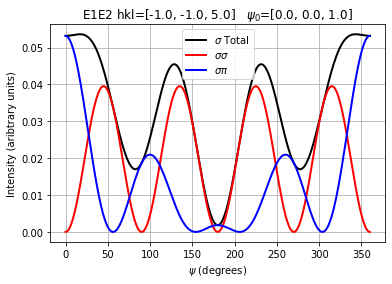


Tensor components

         Crystal (spherical):  [ 0.+0.j -0.+0.j -0.+0.j  1.+0.j  0.+0.j -0.-0.j -0.+0.j]
            Atom (spherical):  [ 1.   +0.j -0.   +0.j -0.   -0.j  0.565+0.j  0.   -0.j  0.   -0.j
 -1.   -0.j]
  Struct. factor (spherical):  [ 1.-0.j  0.-0.j  0.+0.j -0.+0.j -0.+0.j -0.-0.j -1.-0.j]
      Scattering phase (rad):  2.55

Crystal (Cartesian):

[[[ 0.   +0.j -0.   +0.j -2.068+0.j]
  [-0.   +0.j -0.   +0.j -0.   +0.j]
  [-2.068+0.j -0.   +0.j -0.   +0.j]]

 [[-0.   +0.j -0.   +0.j -0.   +0.j]
  [ 0.   -0.j -0.   +0.j -2.068+0.j]
  [-0.   +0.j -2.068+0.j -0.   +0.j]]

 [[-2.068+0.j -0.   +0.j -0.   +0.j]
  [-0.   +0.j -2.068+0.j -0.   +0.j]
  [-0.   +0.j -0.   +0.j  4.135+0.j]]]

Atom (Cartesian):

[[[ 4.088+0.j  0.   +0.j -1.034+0.j]
  [ 0.   +0.j -4.088-0.j -0.   -0.j]
  [-1.034+0.j -0.   -0.j -0.   +0.j]]

 [[ 0.   +0.j -4.088-0.j -0.   -0.j]
  [-4.088-0.j -0.   -0.j -1.034-0.j]
  [-0.   -0.j -1.034-0.j  0.   -0.j]]

 [[-1.034+0.j -0.   -0.j -0.   +0.j]
  [-0.   -

array([[[ 6.792-4.554j,  0.   -0.j   , -0.001-0.001j],
        [ 0.   -0.j   , -6.792+4.554j,  0.   +0.001j],
        [-0.001-0.001j,  0.   +0.001j,  0.   -0.j   ]],

       [[ 0.   -0.j   , -6.792+4.554j,  0.   +0.001j],
        [-6.792+4.554j,  0.   -0.j   ,  0.001+0.001j],
        [ 0.   +0.001j,  0.001+0.001j, -0.   +0.j   ]],

       [[-0.001-0.001j,  0.   +0.001j,  0.   -0.j   ],
        [ 0.   +0.001j,  0.001+0.001j, -0.   +0.j   ],
        [ 0.   -0.j   , -0.   +0.j   ,  0.   +0.j   ]]])

In [2]:
import TensorScatteringClass as ten
import numpy as np
np.random.seed(0)
t=ten.TensorScatteringClass(CIFfile='/home/spc93/spc_cifs/GaN_icsd_87830.cif', Site='Ga1');
#t.invert()
t.PlotIntensityInPolarizationChannels('E1E2', lam=12.4/10.37, hkl=np.array([-1,-1,5]), hkln=np.array([0,0,1]), K=3, Time=1, Parity=-1, sigmapi='sigma')
t.print_tensors()
t.Fc_before_normalization